In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ads_data = pd.read_csv(r'../data/paidTraffic.csv', index_col = 0)

In [3]:
organic_traffic = pd.read_csv(r'../data/organicTraffic.csv', index_col=0)

In [4]:
ads_data.head()

,periodCode,platformCode,channelCode,marketingInvestment,clicks,visits,impressions,conversions,deliveries
0,2020-01-02,AdWords,adwords_bra,167.09,266,306,408,4,4
1,2020-01-02,AdWords,adwords_dsa,31.06,12,11,370,0,0
2,2020-01-02,AdWords,adwords_pla,10868.92,2609,2667,191564,27,27
3,2020-01-02,AdWords,adwords_rem,762.06,386,429,24668,3,3
4,2020-01-02,AdWords,adwords_sea,41.59,26,36,531,0,0


In [5]:
ads_revenue = pd.read_csv(r'../data/pushedSales.csv')

In [6]:
base_sales = pd.read_csv(r'../data/organicSales.csv')

In [7]:
ads_revenue.head()

,createdAt,platformCode,channelCode,quantity,total,delivery,revenue
0,2020-01-02,AdWords,adwords_bra,11,6105,489,5581
1,2020-01-02,AdWords,adwords_pla,136,63838,3590,60605
2,2020-01-02,AdWords,adwords_rem,8,3125,373,2681
3,2020-01-02,HeurekaCz,heureka,4,16256,1031,15131
4,2020-01-02,RtbHouse,rtbhouse,1,1234,116,1082


In [8]:
ads_revenue = ads_revenue.rename(columns = {"delivery": "shipping", "total": "total_bill", "revenue":"revenue_after_dis", "quantity":"prod_quantity"})

In [9]:
ads_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   createdAt          739 non-null    object
 1   platformCode       739 non-null    object
 2   channelCode        739 non-null    object
 3   prod_quantity      739 non-null    int64 
 4   total_bill         739 non-null    int64 
 5   shipping           739 non-null    int64 
 6   revenue_after_dis  739 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 40.5+ KB


In [10]:
revenue_ads = ads_revenue[['createdAt', 'platformCode', 'channelCode', 'revenue_after_dis']]

In [11]:
ads_data = ads_data.rename(columns={'periodCode':'createdAt'})

In [12]:
ads_attributions = pd.merge(ads_data, revenue_ads, left_on = ['createdAt', 'platformCode', 'channelCode'], right_on = ['createdAt', 'platformCode', 'channelCode'])

In [13]:
ads_attributions.head()

,createdAt,platformCode,channelCode,marketingInvestment,clicks,visits,impressions,conversions,deliveries,revenue_after_dis
0,2020-01-02,AdWords,adwords_bra,167.09,266,306,408,4,4,5581
1,2020-01-02,AdWords,adwords_pla,10868.92,2609,2667,191564,27,27,60605
2,2020-01-02,AdWords,adwords_rem,762.06,386,429,24668,3,3,2681
3,2020-01-02,HeurekaCz,heureka,262.39,52,69,0,3,3,15131
4,2020-01-02,RtbHouse,rtbhouse,92.40,0,63,0,1,1,1082


# Analyzing Market Impact of Ads
The analysis can be done per each day of advertisement for each channel or on aggregated data for each channel over the entire period. The latter will be of use as inputs for optimization models. however, the former option will enable analysis such the performance of each channel overtime. 
With a goal of the latter choice, the data will be aggregated over the entire period for this analysis.

In [14]:
aggregated_attribution = ads_attributions.drop('createdAt', axis=1)
aggregated_attribution = aggregated_attribution.groupby([ "platformCode", "channelCode"])['marketingInvestment','impressions','clicks', 'visits', 'conversions', 'deliveries',"revenue_after_dis"].sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_544\3937663857.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  aggregated_attribution = aggregated_attribution.groupby([ "platformCode", "channelCode"])['marketingInvestment','impressions','clicks', 'visits', 'conversions', 'deliveries',"revenue_after_dis"].sum()


In [15]:
aggregated_attribution.reset_index(inplace=True)

In [16]:
aggregated_attribution.head()

,platformCode,channelCode,marketingInvestment,impressions,clicks,visits,conversions,deliveries,revenue_after_dis
0,AdWords,adwords_bra,11016.44,32943,17830,20854,680,642,2634271
1,AdWords,adwords_dsa,655.35,2588,98,104,3,3,8953
2,AdWords,adwords_pla,762545.80,14586376,183696,189367,2078,2034,3760160
3,AdWords,adwords_rem,49948.62,1467433,16241,17719,114,112,265874
4,AdWords,adwords_sea,776.33,6647,339,491,12,12,17887


In [17]:
aggregated_attribution.to_csv('../data/agg-ads-data.csv')

Click-through rate

In [18]:
aggregated_attribution['CTR'] = aggregated_attribution['clicks']/aggregated_attribution['impressions']

In [19]:
aggregated_attribution.head()

,platformCode,channelCode,marketingInvestment,impressions,clicks,visits,conversions,deliveries,revenue_after_dis,CTR
0,AdWords,adwords_bra,11016.44,32943,17830,20854,680,642,2634271,0.541238
1,AdWords,adwords_dsa,655.35,2588,98,104,3,3,8953,0.037867
2,AdWords,adwords_pla,762545.80,14586376,183696,189367,2078,2034,3760160,0.012594
3,AdWords,adwords_rem,49948.62,1467433,16241,17719,114,112,265874,0.011068
4,AdWords,adwords_sea,776.33,6647,339,491,12,12,17887,0.051000


Conversion rate

In [20]:
aggregated_attribution['CR'] = aggregated_attribution['conversions']/aggregated_attribution['clicks']

In [21]:
aggregated_attribution.head()

,platformCode,channelCode,marketingInvestment,impressions,clicks,visits,conversions,deliveries,revenue_after_dis,CTR,CR
0,AdWords,adwords_bra,11016.44,32943,17830,20854,680,642,2634271,0.541238,0.038138
1,AdWords,adwords_dsa,655.35,2588,98,104,3,3,8953,0.037867,0.030612
2,AdWords,adwords_pla,762545.80,14586376,183696,189367,2078,2034,3760160,0.012594,0.011312
3,AdWords,adwords_rem,49948.62,1467433,16241,17719,114,112,265874,0.011068,0.007019
4,AdWords,adwords_sea,776.33,6647,339,491,12,12,17887,0.051000,0.035398


Cost per Lead

In [22]:
aggregated_attribution['CPL'] = aggregated_attribution['marketingInvestment']/aggregated_attribution['clicks']

In [23]:
aggregated_attribution.head()

,platformCode,channelCode,marketingInvestment,impressions,clicks,visits,conversions,deliveries,revenue_after_dis,CTR,CR,CPL
0,AdWords,adwords_bra,11016.44,32943,17830,20854,680,642,2634271,0.541238,0.038138,0.617860
1,AdWords,adwords_dsa,655.35,2588,98,104,3,3,8953,0.037867,0.030612,6.687245
2,AdWords,adwords_pla,762545.80,14586376,183696,189367,2078,2034,3760160,0.012594,0.011312,4.151129
3,AdWords,adwords_rem,49948.62,1467433,16241,17719,114,112,265874,0.011068,0.007019,3.075465
4,AdWords,adwords_sea,776.33,6647,339,491,12,12,17887,0.051000,0.035398,2.290059


Cost per Acquisition

In [24]:
aggregated_attribution['CPA'] = aggregated_attribution['marketingInvestment']/aggregated_attribution['conversions']

In [25]:
aggregated_attribution.head()

,platformCode,channelCode,marketingInvestment,impressions,clicks,visits,conversions,deliveries,revenue_after_dis,CTR,CR,CPL,CPA
0,AdWords,adwords_bra,11016.44,32943,17830,20854,680,642,2634271,0.541238,0.038138,0.617860,16.200647
1,AdWords,adwords_dsa,655.35,2588,98,104,3,3,8953,0.037867,0.030612,6.687245,218.450000
2,AdWords,adwords_pla,762545.80,14586376,183696,189367,2078,2034,3760160,0.012594,0.011312,4.151129,366.961405
3,AdWords,adwords_rem,49948.62,1467433,16241,17719,114,112,265874,0.011068,0.007019,3.075465,438.145789
4,AdWords,adwords_sea,776.33,6647,339,491,12,12,17887,0.051000,0.035398,2.290059,64.694167


Return on Investment

In [26]:
aggregated_attribution['ROI'] = aggregated_attribution['revenue_after_dis']/aggregated_attribution['marketingInvestment']

In [27]:
aggregated_attribution.head()

,platformCode,channelCode,marketingInvestment,impressions,clicks,visits,conversions,deliveries,revenue_after_dis,CTR,CR,CPL,CPA,ROI
0,AdWords,adwords_bra,11016.44,32943,17830,20854,680,642,2634271,0.541238,0.038138,0.617860,16.200647,239.121803
1,AdWords,adwords_dsa,655.35,2588,98,104,3,3,8953,0.037867,0.030612,6.687245,218.450000,13.661402
2,AdWords,adwords_pla,762545.80,14586376,183696,189367,2078,2034,3760160,0.012594,0.011312,4.151129,366.961405,4.931061
3,AdWords,adwords_rem,49948.62,1467433,16241,17719,114,112,265874,0.011068,0.007019,3.075465,438.145789,5.322950
4,AdWords,adwords_sea,776.33,6647,339,491,12,12,17887,0.051000,0.035398,2.290059,64.694167,23.040460


In [28]:
aggregated_attribution['channelCode'].nunique()

13

In [29]:
aggregated_attribution['channelCode'].unique()


array(['adwords_bra', 'adwords_dsa', 'adwords_pla', 'adwords_rem',
       'adwords_sea', 'zbozi', 'heureka', 'rtbhouse', 'emailing',
       'sklik_bra', 'sklik_pla', 'sklik_rem', 'sklik_sea'], dtype=object)

In [30]:
aggregated_attribution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   platformCode         14 non-null     object 
 1   channelCode          14 non-null     object 
 2   marketingInvestment  14 non-null     float64
 3   impressions          14 non-null     int64  
 4   clicks               14 non-null     int64  
 5   visits               14 non-null     int64  
 6   conversions          14 non-null     int64  
 7   deliveries           14 non-null     int64  
 8   revenue_after_dis    14 non-null     int64  
 9   CTR                  13 non-null     float64
 10  CR                   14 non-null     float64
 11  CPL                  14 non-null     float64
 12  CPA                  14 non-null     float64
 13  ROI                  14 non-null     float64
dtypes: float64(6), int64(6), object(2)
memory usage: 1.7+ KB


VISUALIZATION OF METRICS

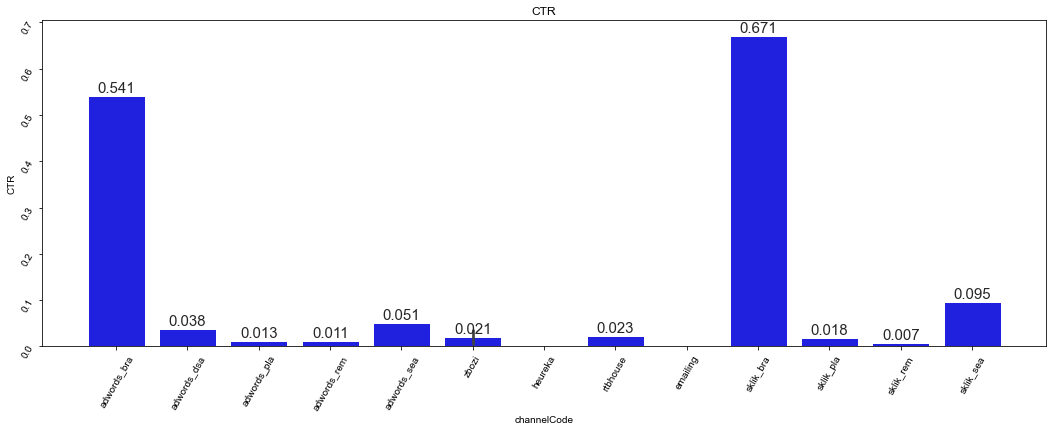

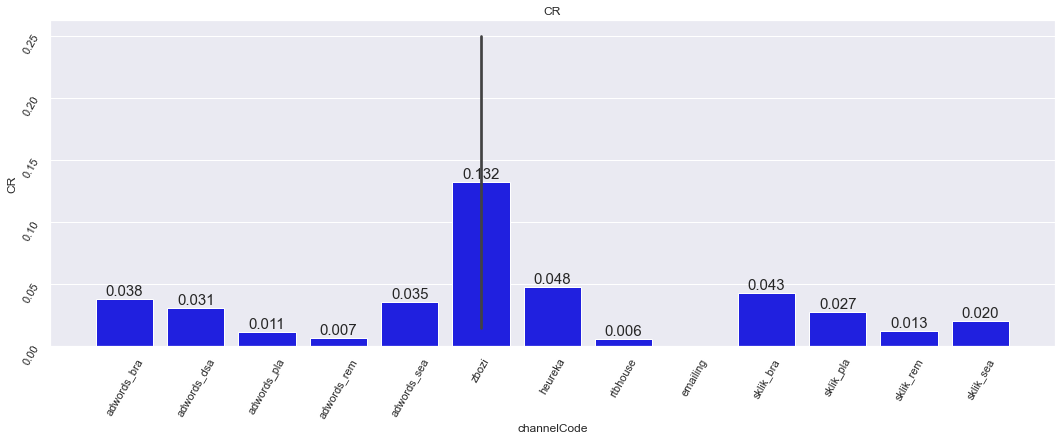

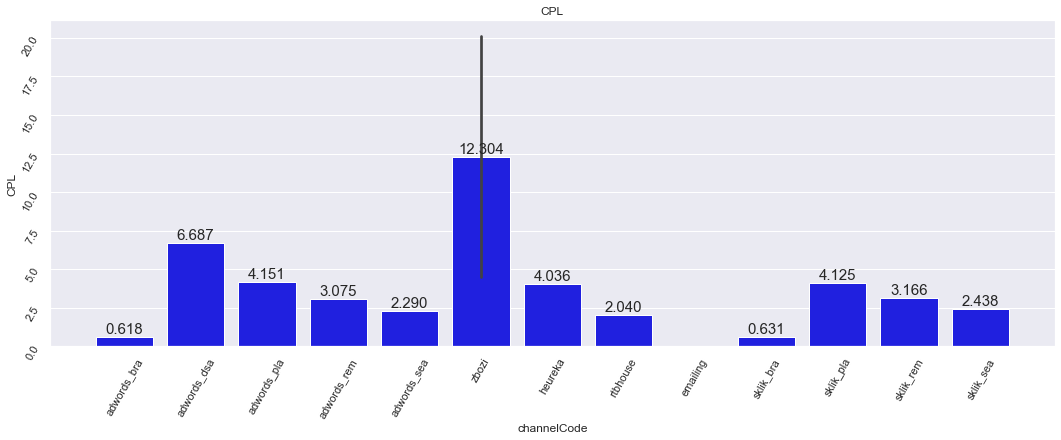

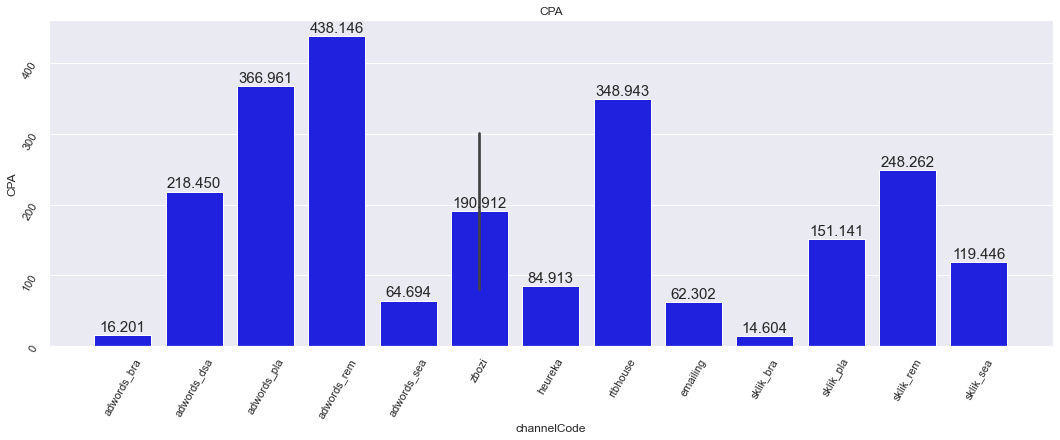

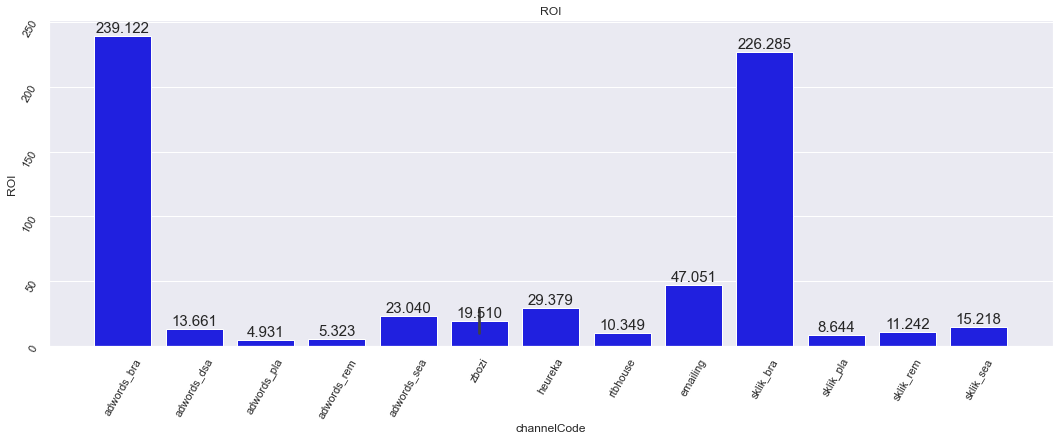

In [31]:
columns = ['CTR', 'CR', 'CPL', 'CPA', 'ROI']
for _ in columns:
    fig, ax = plt.subplots(figsize=(18, 6))
    sns.set_theme(style="darkgrid")
    graph1 = sns.barplot(data = aggregated_attribution, x= 'channelCode', y=_,ax = ax, color= 'blue')
    ax.tick_params(labelrotation=60)
    for bar in graph1.patches:
        graph1.annotate(format(bar.get_height(), '.3f'),
                    (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                    size=15, xytext=(0, 8),
                    textcoords='offset points')
    plt.title(_)
    plt.plot()

Do channels with high customer acquisition cost have the highest ROI?

In [32]:
# correlation between CPA and ROI
cost_vs_rev = aggregated_attribution[['channelCode', 'CPA', 'ROI']]
cost_vs_rev.corr()

,CPA,ROI
CPA,1.000000,-0.588707
ROI,-0.588707,1.000000


[]

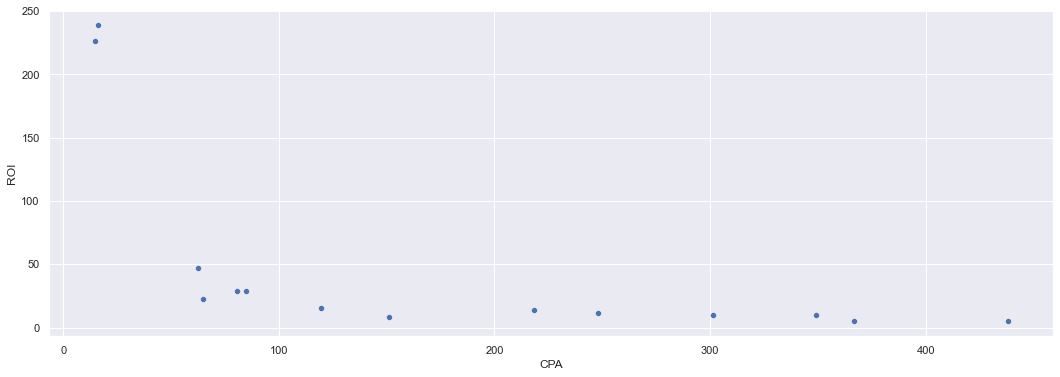

In [33]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.scatterplot(x='CPA', y='ROI', data =cost_vs_rev, ax = ax)
plt.plot()

Is there a corelation between clickthrough rates and coversion rate

[]

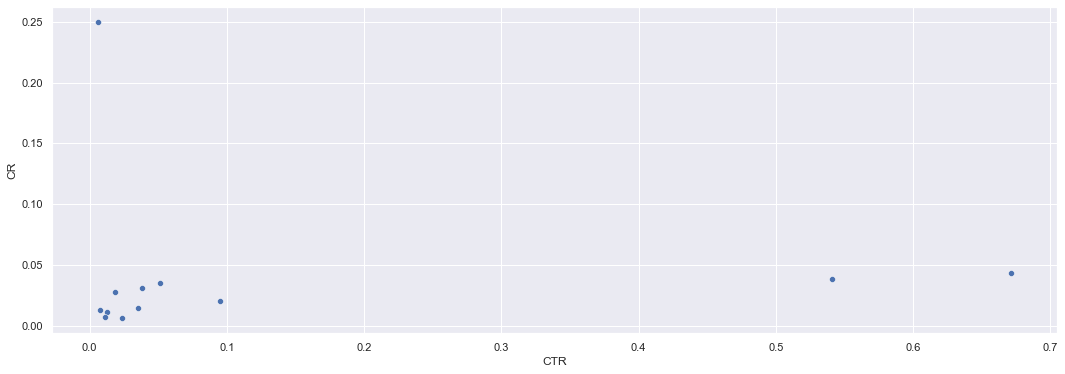

In [34]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.scatterplot(x='CTR', y='CR', data =aggregated_attribution, ax = ax)
plt.plot()

In [35]:
leads_vs_conversions = aggregated_attribution[['channelCode', 'CTR', 'CR']]
leads_vs_conversions.corr()

,CTR,CR
CTR,1.000000,-0.029986
CR,-0.029986,1.000000


As observed, there are varying relationships between the various metrics of each channel. This means that each advertising channel has its advantages ie some reaches more users in terms of brand exposure, some target likely leads/conversions, while some target potential customers with probable high lifetime value. 
Thus, having an optimized marketing mix is what will provide the best returns for the business.